In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=[8,4]
import os
import seaborn as sns

In [2]:
os.chdir(r'D:\Datasets')
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

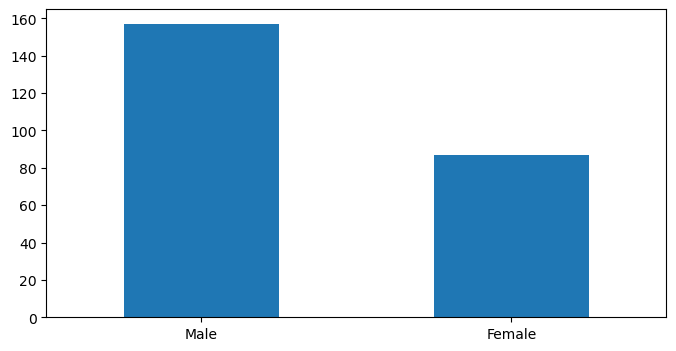

In [3]:
#Frequency of male and female
tips.sex.value_counts().plot(kind='bar')
tips.sex.value_counts().to_frame()
plt.xticks(rotation=0)

smoker
sex    smoker        
Female No          54
       Yes         33
Male   No          97
       Yes         60

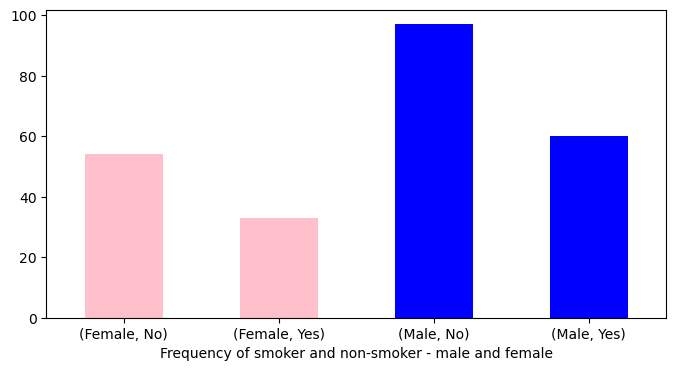

In [4]:
#Frequency of smoker and non-smoker - male and female
tips.groupby(['sex'])['smoker'].value_counts().plot(kind='bar',color=['pink','pink','blue','blue'])
plt.xticks(rotation=0)
plt.xlabel('Frequency of smoker and non-smoker - male and female')
tips.groupby(['sex'])['smoker'].value_counts().to_frame()

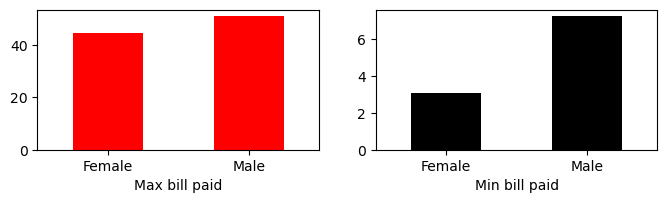

MAXIMUM BILL PAID BY MALE AND FEMALE
        total_bill
sex               
Female       44.30
Male         50.81
MINIMUM BILL PAID BY MALE AND FEMALE
        total_bill
sex               
Female        3.07
Male          7.25


In [5]:
# Maximum and minimum bill paid by male and female
plt.subplot(2,2,1)
tips.groupby(['sex'])['total_bill'].max().plot(kind='bar',color='r')
plt.xlabel('Max bill paid')
plt.xticks(rotation=0)
plt.subplot(2,2,2)
tips.groupby(['sex'])['total_bill'].min().plot(kind='bar',color='k')
plt.xlabel('Min bill paid')
plt.xticks(rotation=0)
plt.show()
print('MAXIMUM BILL PAID BY MALE AND FEMALE')
print(tips.groupby(['sex'])['total_bill'].max().to_frame())
print('MINIMUM BILL PAID BY MALE AND FEMALE')
print(tips.groupby(['sex'])['total_bill'].min().to_frame())

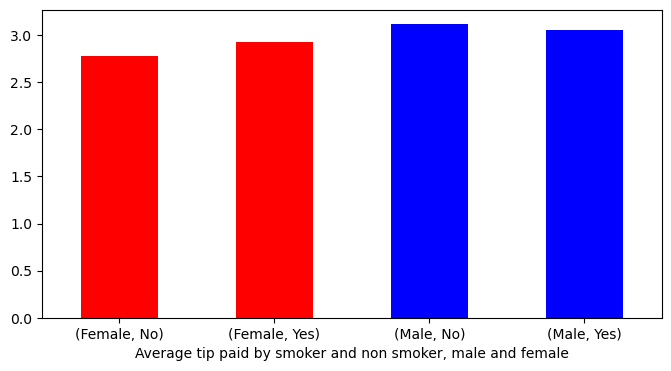

tip
sex    smoker          
Female No      2.773519
       Yes     2.931515
Male   No      3.113402
       Yes     3.051167

In [6]:
# average tip paid by smoker and non smoker, male and female
tips.groupby(['sex','smoker'])['tip'].mean().plot.bar(color=['red','red','blue','blue'])
plt.xticks(rotation=0)
plt.xlabel('Average tip paid by smoker and non smoker, male and female')
plt.show()
tips.groupby(['sex','smoker'])['tip'].mean().to_frame()

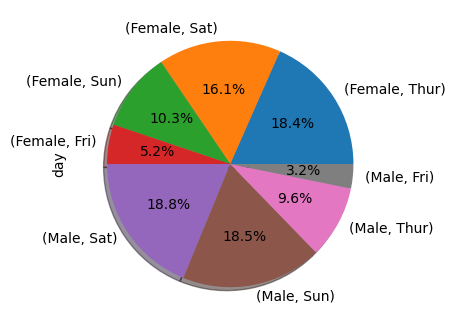

In [7]:
# Pie chart showing customer frequency as per weekdays
tips.groupby(['sex'])['day'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',shadow=True)
plt.show()

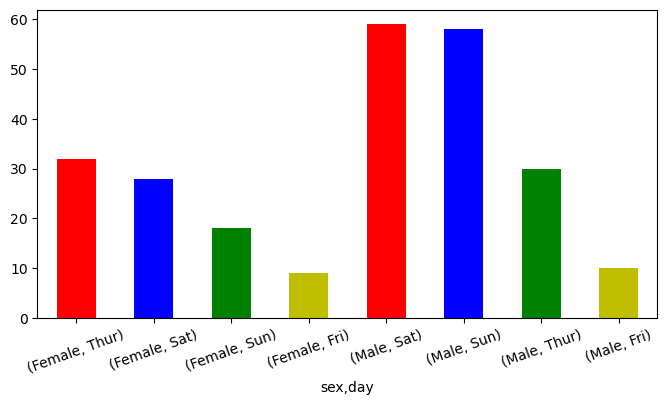

In [8]:
# Bar chart showing customer frequency as per weekdays
tips.groupby(['sex'])['day'].value_counts().plot(kind='bar',color=['r','b','g','y'])
plt.xticks(rotation=20)
plt.show()

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


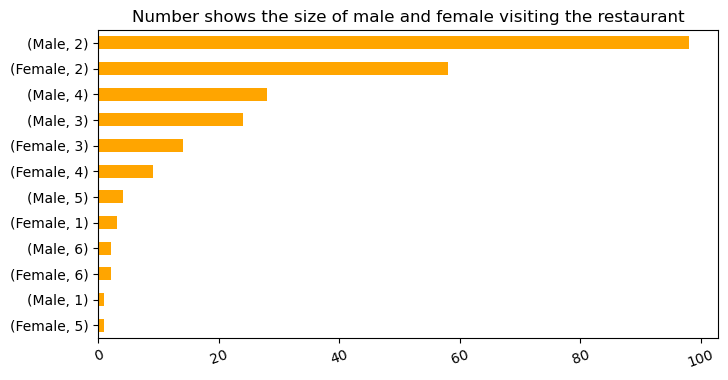

In [10]:
# Bar chart showing frequency of size of male and female visiting
tips.groupby(['sex'])['size'].value_counts().sort_values().plot(kind='barh',color='orange')
plt.title('Number shows the size of male and female visiting the restaurant')
plt.ylabel('')
plt.xticks(rotation=20)
plt.show()

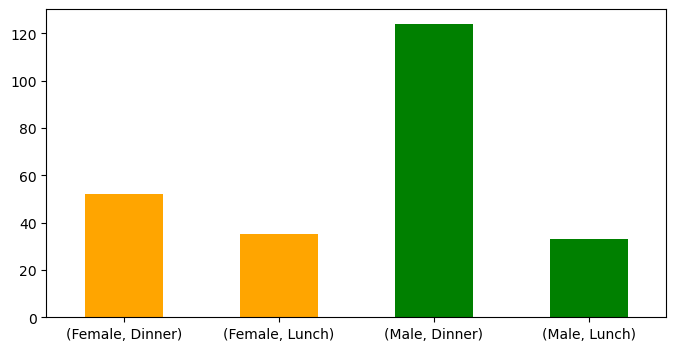

In [11]:
tips.groupby(['sex'])['time'].value_counts().plot(kind='bar',color=['orange','orange','green','green'])
plt.xticks(rotation=0)
plt.xlabel('')
plt.show()

In [12]:
# percent of tips on total bill
tips['tip%'] = tips.tip/tips.total_bill * 100
tips['tip%'] = tips['tip%'].apply(lambda x: str(x).split('.')[0])
tips['tip%'] = tips['tip%'].apply(lambda x:int(x))
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip%
0,16.99,1.01,Female,No,Sun,Dinner,2,5
1,10.34,1.66,Male,No,Sun,Dinner,3,16
2,21.01,3.50,Male,No,Sun,Dinner,3,16
3,23.68,3.31,Male,No,Sun,Dinner,2,13
4,24.59,3.61,Female,No,Sun,Dinner,4,14


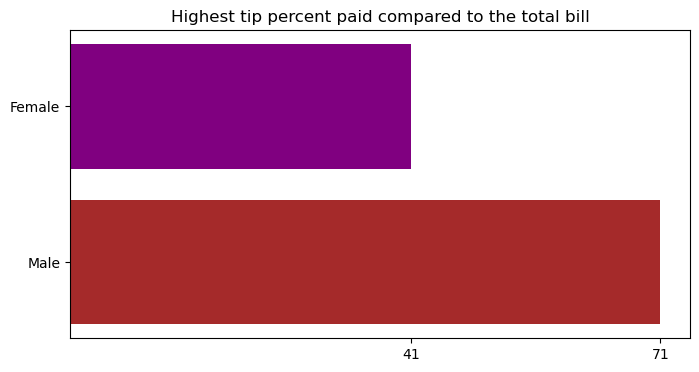

,total_bill,tip,sex,tip%
172,7.25,5.15,Male,71
178,9.60,4.00,Female,41


In [13]:
# Highest tip percent paid compared to the total bill
highest_tip = tips.sort_values(by='tip%',ascending=False)[:2]
x = list(highest_tip.sex)
y = list(highest_tip['tip%'])
plt.barh(x,y,color=['brown','purple'])
plt.title('Highest tip percent paid compared to the total bill')
plt.xticks(y)
plt.show()
highest_tip[['total_bill','tip','sex','tip%']]